In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [2]:
# input
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


# Feature Engineering 

In [3]:
print(df_train.columns)
print(df_train.head())
print(df_train.describe())

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
         id  log_price property_type        room_type  \
0  13662370   3.806662         House     Private room   
1   4765892   4.941642     Apartment  Entire home/apt   
2  21169968   4.941642     Apartment  Entire home/apt   
3   7939196   4.867534     Apartment  Entire home/apt   
4  18161036   3.663562         House     Private room   

                                           amenities  accommodates  bathrooms  \
0  {TV,Internet,"Wireless Internet","Air conditio...       

In [4]:
# zipcode to numerical columns
df_zipcode = pd.get_dummies(df_train['zipcode'])
df = pd.concat([df_train, df_zipcode], axis=1).fillna(0.0)
print(list(df.columns))
df.head()


['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds', ' ', '02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02127', '02128', '02129', '02130', '02131', '02132', '02134', '02135', '02136', '02138', '02139', '02145', '02152', '02186', '02199', '02210', '02215', '02445', '02446', '02467', '07306', '10000', '10001', '10001.0', '10002', '10002.0', '10003', '10003-8623', '10003.0', '10004', '10004.0', '10005', '10006', '10007', '10009', '10009.0', '10010', '10010.0', '10011', '10011.0', '10012', '10012.0', '10013

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,94124,94127,94129,94130,94131,94132,94133,94134,94158,95202 94158
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,0,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# select the columns
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating'] + list(df_zipcode.columns)
y_column = ['log_price']

In [6]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
print(df_train.isnull().sum())
#df_train['review_scores_rating'] = df_train['review_scores_rating'].fillna(df_train['review_scores_rating'].mean)
df_train['review_scores_rating'] = df_train['review_scores_rating'].fillna(94.03)
df_train = df_train.fillna(0.0)
print(df_train.shape)
print(df_train.isnull().sum())


(51000, 6)
accommodates                0
bathrooms                 133
bedrooms                   63
beds                       85
review_scores_rating    11450
log_price                   0
dtype: int64
(51000, 6)
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
review_scores_rating    0
log_price               0
dtype: int64


# Model Training

In [7]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 5)
y_train (40800, 1)
X_test (10200, 5)
y_test (10200, 1)


In [8]:
# model_training function
def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [9]:
# model_prediction function
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [10]:
# train a knn regressor model
#model_KNN = KNeighborsRegressor(10)
#model_KNN.fit(X_train, y_train)
#y_pred_KNN = model_KNN.predict(X_test)

In [11]:
# train a linear regression model
#model_LR = LinearRegression()
#model_LR.fit(X_train, y_train)
#y_pred_LR = model_LR.predict(X_test)

In [12]:
# train a decision tree regressor model
#model_DT = DecisionTreeRegressor()
#model_DT.fit(X_train, y_train)
#y_pred_DT = model_DT.predict(X_test)

In [13]:
# train a random forest model
#model_RF = RandomForestRegressor()
#model_RF.fit(X_train, y_train)
#y_pred_RF = model_RF.predict(X_test)

# Model Evaluation

In [14]:
# model_evaluation function
def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.show()
    print('')

In [15]:
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print('RMSE', round(rmse, 2))
#plt.scatter(y_test, y_pred, alpha=0.3)
#plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
#plt.title('Linear Regression')
#plt.xlabel('True Value')
#plt.ylabel('Predict Value')
#plt.show()

# Experiments

Linear Regression
RMSE 0.5725261445829024


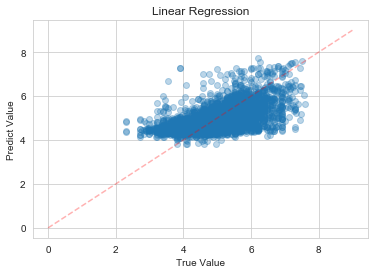


KNN 5
RMSE 0.5668182508279653


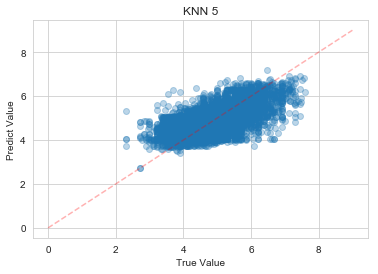


KNN 2
RMSE 0.6119728518929403


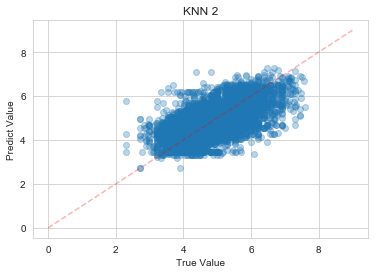


Decision Tree
RMSE 0.5545611201462102


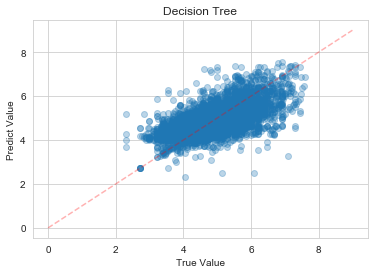

/home/coastrock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest 10
RMSE 0.5357869430412484


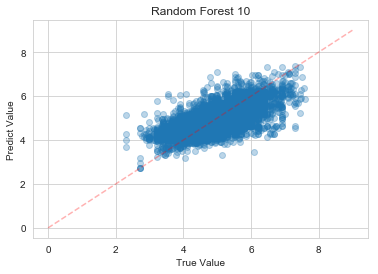

/home/coastrock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest 100
RMSE 0.5323367900181591


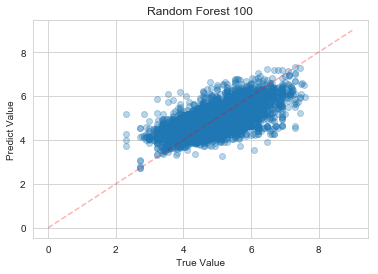

In [16]:
# run_experiment function
def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    
run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)

# Error Analysis

In [17]:
model = RandomForestRegressor(100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/coastrock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [18]:
#for i in range(len(X_test.columns)):
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
pd.DataFrame(fi).sort_values(1, ascending=False)

,0,1
2,bedrooms,0.530940
0,accommodates,0.198451
1,bathrooms,0.124848
4,review_scores_rating,0.094332
3,beds,0.051429


# Prepare submission

In [19]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.547145
1,16436737,4.602544
2,18209634,4.091430
3,15027024,4.318025
4,18074243,5.361263
5,8446914,4.553959
6,19362916,5.240001
7,16116059,5.477441
8,20912583,4.318025
9,13573101,4.969731


In [20]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)